In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

### 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

model = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=42)
selector = RFE(model, n_features_to_select=4)
selector = selector.fit(X, y)

features = X.columns[selector.support_ == True]
features

Index(['Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

In [4]:
X = diabetes[features]
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [5]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.58      0.75      0.66        80

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.73      0.73       231



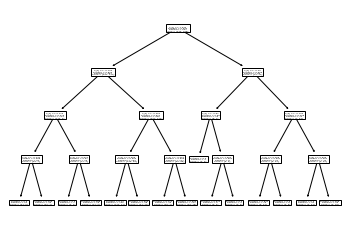

In [8]:
graph = tree.plot_tree(model)
plt.show()

### Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)
Example input: [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]
Example output: Nichole, Tanisha & Maggie

In [9]:
def format_string(example):
    format_str = ""
    for index, element in enumerate(example):
        if index == 0:
            format_str += element["name"]
        elif index == len(example)-1:
            format_str += " & " + element["name"] 
        else:
            format_str += ", " + element["name"] 

    return format_str

In [10]:
example = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]
format_string(example)

'Nichole, Tanisha & Maggie'

In [11]:
example = [ {'name': 'Nichole'}, {'name': 'Tanisha'},{'name': 'Maggie'},{'name': 'Megan'} ]
format_string(example)

'Nichole, Tanisha, Maggie & Megan'